This notebook is used to visualize data as well as descriptive statistics presented in the thesis.

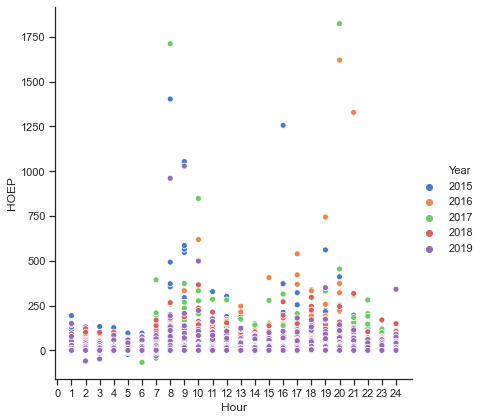

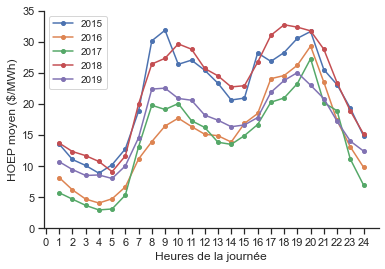

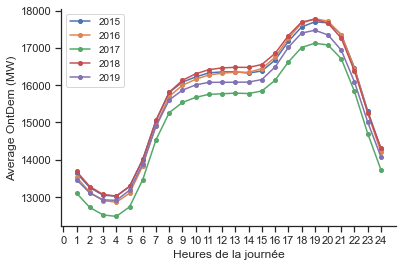

In [4]:
import numpy as np
import pandas as pd
from datetime import datetime
from typing import List
%matplotlib inline  

import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt 
from IPython.display import Image
sns.set() # Use seaborn style

# Import HOEP dataset for multiple years
file = 'HOEP_2015-2019_dataset.csv'
df = pd.read_csv(file)
df = df[['Date', 'Hour', 'Year', 'Month', 'Weekday', 'HOEP', 'OntDem', 'MktDem']]
df2015 = df.loc[:8759] 
df2016 = df.loc[8760:17543]
df2017 = df.loc[17544:26303]
df2018 = df.loc[26304:35063]
df2019 = df.loc[35064:] 

with sns.axes_style("ticks", {"grid.color": "white"}):
    sns.relplot(x="Hour", y="HOEP", hue="Year", palette="muted", height=6, legend="full", data=df)
    plt.xticks(list(range(0,25,1)))
    #plt.savefig('HOEP_year_hour')
    
with sns.axes_style("ticks", {"grid.color": "white"}):
    df.pivot_table('HOEP', index='Hour',
                    columns='Year', aggfunc='mean').plot(marker='o', markersize=4)
    plt.legend(loc = 'upper left', fontsize = 'small')
    plt.ylabel('HOEP moyen ($/MWh)')
    plt.xlabel('Heures de la journée')
    plt.xticks(list(range(0,25,1)))
    plt.yticks(list(range(0,40,5)))
    sns.despine()  # to get rid of the top and right axes spines, which are not needed.
    #plt.rcParams["figure.figsize"] = (12,10)
    #plt.savefig('Avg_HOEP_year',dpi=1100, bbox_inches='tight')
    
with sns.axes_style("ticks", {"grid.color": "white"}):
    df.pivot_table('OntDem', index='Hour',
                    columns='Year', aggfunc='mean').plot(marker='o', markersize=4)
    plt.legend(loc = 'upper left', fontsize = 'small')
    plt.ylabel('Average OntDem (MW)')
    plt.xlabel('Heures de la journée')
    plt.xticks(list(range(0,25,1)))
    sns.despine()  # to get rid of the top and right axes spines, which are not needed.
    #plt.rcParams["figure.figsize"] = (12,10)
    #plt.savefig('Avg_HOEP_year',dpi=1200, bbox_inches='tight')

In [5]:
# Descriptive stats 
df_stats = df[['Year','HOEP', 'MktDem', 'OntDem']]
df_stats.groupby(['Year']).agg([np.mean, np.std, np.min, np.max])

HOEP                                   MktDem                      \
           mean        std   amin     amax          mean          std   amin   
Year                                                                           
2015  21.663944  35.324080 -22.42  1402.44  18154.229680  2400.672632  12375   
2016  14.899044  32.162658  -9.82  1619.60  18007.084699  2302.472370  12351   
2017  14.138285  36.249021 -67.08  1822.95  17189.314269  2041.692105  12316   
2018  22.444435  22.131897  -4.39   365.64  17766.184132  2133.476285  13074   
2019  16.715850  23.550614 -59.29  1028.52  17631.958790  2127.572757  12947   

                   OntDem                             
       amax          mean          std   amin   amax  
Year                                                  
2015  26087  15640.614155  2344.321173  10539  22516  
2016  25093  15595.371926  2414.687005  10461  23213  
2017  23504  15078.880365  2172.831314  10167  21786  
2018  24490  15689.103425  2318.553939  10541  23240  
2019  24561  15422.540525  2265.880435  10328  21791

In [6]:
###########################################################################################
# Percentile table to show distribution of HOEP per year, to explain arbitrage variation #
#########################################################################################
perc_2015 = np.percentile(df2015.HOEP, [25, 50, 75, 85])
perc_2016 = np.percentile(df2016.HOEP, [25, 50, 75, 85])
perc_2017 = np.percentile(df2017.HOEP, [25, 50, 75, 85])
perc_2018 = np.percentile(df2018.HOEP, [25, 50, 75, 85])
perc_2019 = np.percentile(df2019.HOEP, [25, 50,75, 85])

percentile = pd.DataFrame([25, 50, 75, 85], columns=['Centile'])
percentile['2015'] = perc_2015
percentile['2016'] = perc_2016
percentile['2017'] = perc_2017
percentile['2018'] = perc_2018
percentile['2019'] = perc_2019
percentile.set_index(percentile.Centile, inplace=True)
percentile = percentile.T.round(2)
percentile = percentile.drop('Centile')
percentile
#print(percentile.to_latex())

Centile,25,50,75,85
2015,7.38,17.46,28.55,32.67
2016,0.80,10.38,22.89,28.52
2017,0.00,7.36,20.56,32.28
2018,6.00,17.05,34.36,40.28
2019,3.02,14.36,25.56,29.36


In [15]:
import numpy as np
import pandas as pd
from datetime import datetime
from typing import List
%matplotlib inline  

import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt 
from IPython.display import Image
sns.set() # Use seaborn style

file = 'HOEP_2015-2019_dataset.csv'
df = pd.read_csv(file)
df = df[['Date','Hour','HOEP']]
df['HOEP_lag168'] = df.HOEP.shift(168)
df['HOEP_lag24'] = df.HOEP.shift(24)
df['Datetime'] = pd.to_datetime(df.Date) + pd.to_timedelta(df.Hour, unit='h')

df2015 = df.loc[:8759] 
df2016 = df.loc[8760:17543]
df2017 = df.loc[17544:26303]
df2018 = df.loc[26304:35063]
df2019 = df.loc[35064:]

XGboost_2016 = pd.read_csv('HOEP_2016_forecast_XGB1.csv')
XGboost6_2016 = pd.read_csv('HOEP_2016_forecast_XGB6.csv')
XGboost12_2016 = pd.read_csv('HOEP_2016_forecast_XGB12.csv')
XGboost24_2016 = pd.read_csv('HOEP_2016_forecast_XGB24.csv')

df2016 = df2016.reset_index(drop=True)
df2016['XGB1'] = XGboost_2016.Forecast
df2016['XGB6'] = XGboost6_2016.Forecast
df2016['XGB12'] = XGboost12_2016.Forecast
df2016['XGB24'] = XGboost24_2016.Forecast
df2016

,Date,Hour,HOEP,HOEP_lag168,HOEP_lag24,Datetime,XGB1,XGB6,XGB12,XGB24
0,2016-01-01,1,-1.09,0.72,2.33,2016-01-01 01:00:00,-0.018963,0.402132,0.402132,0.402132
1,2016-01-01,2,-2.41,-4.25,0.40,2016-01-01 02:00:00,-2.137242,0.499328,0.604891,0.626550
2,2016-01-01,3,-4.23,-4.35,-3.44,2016-01-01 03:00:00,-2.060675,0.499328,0.604891,0.626550
3,2016-01-01,4,-4.40,-4.40,-4.30,2016-01-01 04:00:00,-2.327649,0.399382,0.416687,0.387857
4,2016-01-01,5,-4.44,-4.40,0.00,2016-01-01 05:00:00,-2.174911,0.499328,0.604891,0.516465
...,...,...,...,...,...,...,...,...,...,...
8779,2016-12-31,20,2.81,11.77,11.09,2016-12-31 20:00:00,5.246418,1.135526,1.938869,3.008782
8780,2016-12-31,21,0.00,11.65,10.41,2016-12-31 21:00:00,3.072220,1.135526,2.028201,3.008782
8781,2016-12-31,22,0.00,14.38,14.37,2016-12-31 22:00:00,1.040984,0.825261,1.001909,3.008782
8782,2016-12-31,23,0.00,38.63,16.32,2016-12-31 23:00:00,0.587296,0.810896,1.001909,3.008782


In [8]:
# Summary stats
print("Stats 2016", df2016['HOEP'].describe())
print("Stats 2017", df2017['HOEP'].describe())
print("Stats 2018", df2018['HOEP'].describe())
print("Stats 2019", df2019['HOEP'].describe())

Stats 2016 count    8784.000000
mean       14.899044
std        32.162658
min        -9.820000
25%         0.800000
50%        10.380000
75%        22.890000
max      1619.600000
Name: HOEP, dtype: float64
Stats 2017 count    8760.000000
mean       14.138285
std        36.249021
min       -67.080000
25%         0.000000
50%         7.365000
75%        20.562500
max      1822.950000
Name: HOEP, dtype: float64
Stats 2018 count    8760.000000
mean       22.444435
std        22.131897
min        -4.390000
25%         6.000000
50%        17.045000
75%        34.362500
max       365.640000
Name: HOEP, dtype: float64
Stats 2019 count    8760.000000
mean       16.715850
std        23.550614
min       -59.290000
25%         3.017500
50%        14.360000
75%        25.560000
max      1028.520000
Name: HOEP, dtype: float64


In [23]:
import numpy as np
import pandas as pd
from datetime import datetime
from typing import List
%matplotlib inline  

import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt 
from IPython.display import Image
sns.set() # Use seaborn style

df2019 = df2019.reset_index(drop=True)

XGboost_2019 = pd.read_csv('HOEP_2019_forecast_XGB1.csv')
XGboost6_2019 = pd.read_csv('HOEP_2019_forecast_XGB6.csv')
XGboost12_2019 = pd.read_csv('HOEP_2019_forecast_XGB12.csv')
XGboost24_2019 = pd.read_csv('HOEP_2019_forecast_XGB24.csv')
df2019['XGB1'] = XGboost_2019.Forecast
df2019['XGB6'] = XGboost6_2019.Forecast
df2019['XGB12'] = XGboost12_2019.Forecast
df2019['XGB24'] = XGboost24_2019.Forecast
df2019

,Date,Hour,HOEP,HOEP_lag168,HOEP_lag24,Datetime,XGB1,XGB6,XGB12,XGB24
0,2019-01-01,1,0.00,14.35,20.44,2019-01-01 01:00:00,0.405360,1.734116,2.580984,0.550321
1,2019-01-01,2,0.00,24.19,13.33,2019-01-01 02:00:00,0.770444,1.849441,5.863590,0.525895
2,2019-01-01,3,-0.11,14.39,13.35,2019-01-01 03:00:00,0.770444,1.849441,5.975186,0.525895
3,2019-01-01,4,-1.84,14.39,28.51,2019-01-01 04:00:00,0.439540,0.777622,4.963967,0.525895
4,2019-01-01,5,-0.47,23.40,26.66,2019-01-01 05:00:00,0.439540,0.777622,5.308259,0.813945
...,...,...,...,...,...,...,...,...,...,...
8755,2019-12-31,20,0.00,14.57,0.00,2019-12-31 20:00:00,4.185117,19.882021,11.321368,6.204323
8756,2019-12-31,21,0.00,13.34,0.00,2019-12-31 21:00:00,4.185117,24.732983,10.372265,6.431560
8757,2019-12-31,22,-0.05,14.39,0.00,2019-12-31 22:00:00,3.987692,15.834212,10.823776,6.204254
8758,2019-12-31,23,-0.04,37.15,0.00,2019-12-31 23:00:00,3.987692,11.040611,10.211909,6.191347


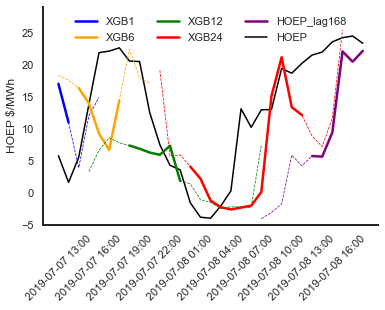

In [26]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

# Select data to display
i=4500
end=30
dates = list(df2019.Datetime.loc[i:i+end])

output = pd.date_range(df2019.Datetime[i], periods=10, freq='3H').strftime('%Y-%m-%d %H:%M')
dates = list(df2019.Datetime[i:i+end])
output_list = []

for a in range(10):
    output_list.append(output[a])
    output_list.append("")
    output_list.append("")

# Select style
fig, ax = plt.subplots()
plt.style.use('seaborn-ticks')  # list of available styles: plt.style.available

# Plot thick line and dashed line for each prediction
plt.plot(df2019.XGB1.loc[i:i+1],color='blue',linewidth=2.5,zorder=2,label='XGB1')
plt.plot(df2019.XGB1.loc[i:i+4],color='blue',linestyle='dashed',linewidth=0.75)

plt.plot(df2019.XGB6.loc[i+2:i+6],color='orange',linewidth=2.5,zorder=2,label='XGB6')
plt.plot(df2019.XGB6.loc[i:i+9],color='orange',linestyle='dashed',linewidth=0.75)

plt.plot(df2019.XGB12.loc[i+7:i+12],color='green',linewidth=2.5,zorder=2,label='XGB12')
plt.plot(df2019.XGB12.loc[i+3:i+20],color='green',linestyle='dashed',linewidth=0.75)

plt.plot(df2019.XGB24.loc[i+13:i+24],color='red',linewidth=2.5,zorder=2,label='XGB24')
plt.plot(df2019.XGB24.loc[i+10:i+28],color='red',linestyle='dashed',linewidth=0.75)

plt.plot(df2019.HOEP_lag168.loc[i+25:i+end],color='purple',linewidth=2.5,zorder=2,label='HOEP_lag168')
plt.plot(df2019.HOEP_lag168.loc[i+20:i+end],color='purple',linestyle='dashed',linewidth=0.75)

plt.plot(df2019.HOEP.loc[i:i+end],color='black',linewidth=1.5,zorder=1,label='HOEP')
plt.ylim(-5,29)

# Change ticks to get dates instead of index
ax.tick_params(axis='both')
plt.xticks(df2019.index[i:i+end], output_list,rotation=45)
    
sns.despine(top=True, right=True)
plt.ylabel('HOEP $/MWh')
plt.grid(False)
plt.setp(ax.spines.values(), linewidth=2)
plt.legend(loc='upper center',ncol=3)
#plt.savefig('predictions_jump_2019',dpi=1100, bbox_inches='tight')

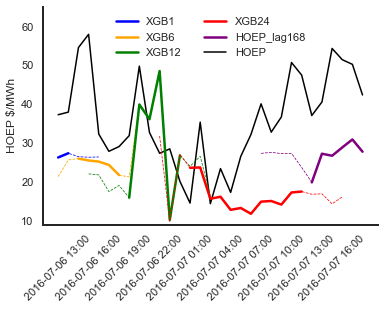

In [25]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

# Select data to display
i=4500
end=30
dates = list(df2016.Datetime.loc[i:i+end])

# Create x axis dates
output = pd.date_range(df2016.Datetime[i], periods=10, freq='3H').strftime('%Y-%m-%d %H:%M')
output_list = []
dates = list(df2016.Datetime[i:i+end])

for a in range(10):
    output_list.append(output[a])
    output_list.append("")
    output_list.append("")

# Select style
fig, ax = plt.subplots()
plt.style.use('seaborn-ticks')  # list of available styles: plt.style.available

# Plot thick line and dashed line for each prediction
plt.plot(df2016.XGB1.loc[i:i+1],color='blue',linewidth=2.5,zorder=2,label='XGB1')
plt.plot(df2016.XGB1.loc[i:i+4],color='blue',linestyle='dashed',linewidth=0.75)

plt.plot(df2016.XGB6.loc[i+2:i+6],color='orange',linewidth=2.5,zorder=2,label='XGB6')
plt.plot(df2016.XGB6.loc[i:i+9],color='orange',linestyle='dashed',linewidth=0.75)

plt.plot(df2016.XGB12.loc[i+7:i+12],color='green',linewidth=2.5,zorder=2,label='XGB12')
plt.plot(df2016.XGB12.loc[i+3:i+15],color='green',linestyle='dashed',linewidth=0.75)

plt.plot(df2016.XGB24.loc[i+13:i+24],color='red',linewidth=2.5,zorder=2,label='XGB24')
plt.plot(df2016.XGB24.loc[i+10:i+28],color='red',linestyle='dashed',linewidth=0.75)

plt.plot(df2016.HOEP_lag168.loc[i+25:i+end],color='purple',linewidth=2.5,zorder=2,label='HOEP_lag168')
plt.plot(df2016.HOEP_lag168.loc[i+20:i+end],color='purple',linestyle='dashed',linewidth=0.75)

plt.plot(df2016.HOEP.loc[i:i+end],color='black',linewidth=1.5,zorder=1,label='HOEP')
plt.ylim(9,65)

# Change ticks to get dates instead of index
ax.tick_params(axis='both')
plt.xticks(df2016.index[i:i+end], output_list,rotation=45)
    
sns.despine()
plt.ylabel('HOEP $/MWh')
plt.grid(False)
plt.setp(ax.spines.values(), linewidth=2)
plt.legend(loc='upper center',ncol=2)
#plt.savefig('predictions_jump_2016',dpi=1100, bbox_inches='tight')

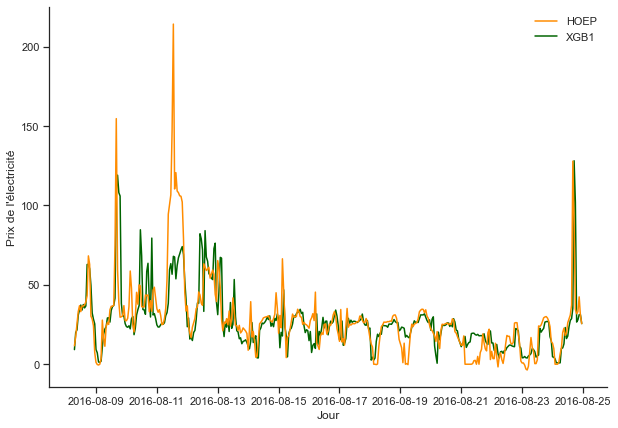

In [27]:
## Select subset of results to plot XGB1 and HOEP to compare ##
##############################################################
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

df2016 = df2016.reset_index(drop=True)

df_subset = df2016.loc[5286:5686]  # choose part of data to illustrate it

with sns.axes_style("ticks", {"grid.color": "white"}):
    fig, ax = plt.subplots(figsize=(10,7))
    sns.lineplot(data=df_subset,x='Datetime', y='HOEP',color="darkorange", legend='full',zorder=2)
    sns.lineplot(data=df_subset,x='Datetime', y='XGB1', color="darkgreen", zorder=1)
    ax.legend(('HOEP', 'XGB1'),loc='best')
    plt.ylabel("Prix de l'électricité")
    plt.xlabel('Jour')
    sns.despine()
    #plt.savefig('HOEPvsXGB1_2016', dpi=1200, bbox_inches='tight')

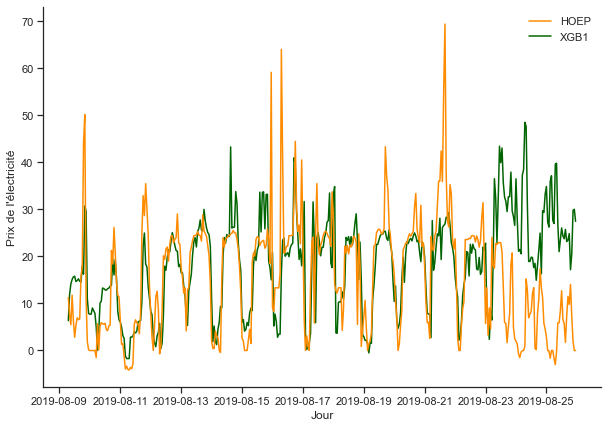

In [28]:
## Select subset of results to plot XGB1 and HOEP to compare ##
##############################################################
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

df2019 = df2019.reset_index(drop=True)

df_subset = df2019.loc[5286:5686]  # choose part of data to illustrate it

with sns.axes_style("ticks", {"grid.color": "white"}):
    fig, ax = plt.subplots(figsize=(10,7))
    sns.lineplot(data=df_subset,x='Datetime', y='HOEP',color="darkorange", legend='full',zorder=2)
    sns.lineplot(data=df_subset,x='Datetime', y='XGB1', color="darkgreen", zorder=1)
    ax.legend(('HOEP', 'XGB1'),loc='best')
    plt.ylabel("Prix de l'électricité")
    plt.xlabel('Jour')
    sns.despine()
    #plt.savefig('HOEPvsXGB1_2019', dpi=1200, bbox_inches='tight')

,Année,HOEP moyen (kWh),Coûts d'ajustements globaux moyens,total,Share_GA
0,2008,5.17,0.61,5.78,10.553633
1,2009,3.16,3.06,6.22,49.196141
2,2010,3.79,2.72,6.51,41.781874
3,2011,3.15,4.02,7.17,56.066946
4,2012,2.41,4.92,7.33,67.121419
5,2013,2.65,5.92,8.57,69.078180
6,2014,3.60,5.46,9.06,60.264901
7,2015,2.36,7.78,10.14,76.725838
8,2016,1.66,9.66,11.32,85.335689
9,2017,1.58,9.97,11.55,86.320346


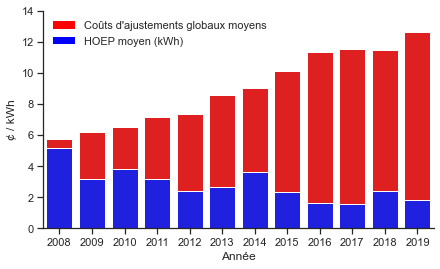

In [29]:
import numpy as np
import pandas as pd
%matplotlib inline  
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

df = pd.read_excel('Average_HOEP_plus_Average_GA.xlsx')

# Create another column for stacked barplot
df["total"] = df['HOEP moyen (kWh)'] + df["Coûts d'ajustements globaux moyens"]

with sns.axes_style("ticks", {"grid.color":"white"}):
    sns.set_context({"figure.figsize": (7,4)})
    sns.barplot(x=df['Année'], y=df.total, color="red")
    bottom_plot = sns.barplot(x=df['Année'], y=df['HOEP moyen (kWh)'], color="blue")

    GA = plt.Rectangle((0,0),1,1,fc="red",edgecolor='none')
    HOEP = plt.Rectangle((0,0),1,1,fc='blue', edgecolor='none')
    l = plt.legend([GA,HOEP],["Coûts d'ajustements globaux moyens",'HOEP moyen (kWh)'],loc=2, ncol=1)
    l.draw_frame(False) #get rid of legend frame
    plt.ylim(0,14)
    sns.despine()
    bottom_plot.set_ylabel("¢ / kWh")
    #plt.savefig('GA+HOEP', dpi=1200, bbox_inches='tight')

df['Share_GA'] = df["Coûts d'ajustements globaux moyens"] / df["total"] * 100
df